## $\mathcal{G}(\mathcal{V},\mathcal{E})$

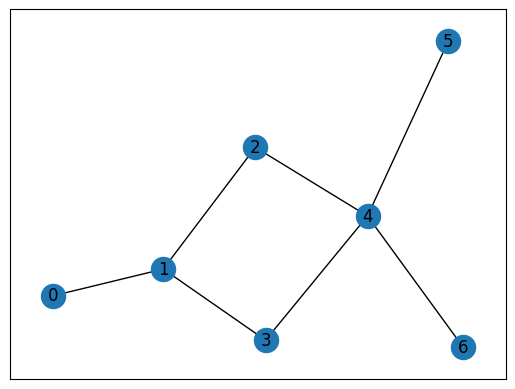

In [ ]:
import networkx as nx

G = nx.Graph()
E = [(0, 1), (1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (4, 6)]
G.add_edges_from(E)
nx.draw_networkx(G)

H = nx.Graph()
E = [(0, 1), (1, 2), (1, 3)]
H.add_edges_from(E)

In [ ]:
# %%capture
# !wget  https://snap.stanford.edu/data/congress_network.zip
# !unzip congress_network.zip

In [ ]:
# with open('congress_network/congress.edgelist', 'r') as f:
#     ng = 9
#     nh = 6
#     eg = []
#     eh = []
#     for e in f:
#         u, v = map(int, e.split()[:2])
#         if u < ng and v < ng:
#             eg.append((u, v))
#             if u < nh and v < nh:
#                 eh.append((u, v))

In [ ]:
# import networkx as nx

# G = nx.Graph(eg)
# H = nx.Graph(eh)
# nx.draw_networkx(H)

## Ising formulation
https://doi.org/10.3389/fphy.2014.00005
$$H(t)=\left(1-\frac{t}{T}\right)H_0+\frac{t}{T}H_P$$
$$T=\mathcal{O}\left(e^{\alpha N^\beta}\right)$$
$$H_0=-h_0\sum_{i=1}^N\sigma_i^x$$
$$H_P=-\sum_{i<j}J_{ij}\,\sigma_i^z\sigma_j^z-\sum_{i=1}^Nh_i\sigma_i^z$$
### Max clique problem (NP-hard)
$$H=H_A+H_B+H_C$$
For spins $s_i=\pm1$, the corresponding binary bit variable is $x_i=\dfrac{s_i+1}{2}$
$$H_A=A\left(1-\sum_{i=2}^Ny_i\right)^2+A\left(\sum_{i=2}^nny_n-\sum_vx_v\right)^2$$
$$H_B=B\left[\frac{1}{2}\left(\sum_{i=2}^Nny_n\right)\left(-1+\sum_{i=2}^Nny_n\right)-1-\sum_{(uv)\in\mathcal{E}}x_ux_v\right]$$
$$H_C=-C\sum_vx_v$$
with $y_i=1$ if size of clique is $i$, $0$ otherwise.
### Graph isomorphism
$$H_A=A\sum_v\left(1-\sum_ix_{v,i}\right)^2+A\sum_i\left(1-\sum_vx_{v,i}\right)^2$$
$$H_B=B\sum_{ij\notin\mathcal{E}_1}\sum_{uv\in\mathcal{E}_2}x_{u,i}x_{v,j}+B\sum_{ij\in\mathcal{E}_1}\sum_{uv\notin\mathcal{E}_2}x_{u,i}x_{v,j}$$

## QUBO formulation
https://doi.org/10.1007/s42979-020-00431-5
### Maximum common induced subgraph isomorphism
Objective $F(x)=A[H(x)+P(x)+N(x)]+BM(x)$
$$H(x)=\sum_{u\in\mathcal{V}_1}\sum_{v\in\mathcal{V}_2}\left(x_{u,v}\sum_{v'\ne v\,\in\mathcal{V}_2}x_{u,v'}\right)+\sum_{v\in\mathcal{V}_2}\sum_{u\in\mathcal{V}_1}\left(x_{u,v}\sum_{u'\ne u\,\in\mathcal{V}_1}x_{u',v}\right)$$
$$P(x)=\sum_{u\in\mathcal{V}_1}\sum_{v\in\mathcal{V}_2}\left(x_{u,v}\sum_{v'\in\mathcal{V}_2}x_{u',v'}\,\tau(u,u',v,v')\right)$$
$$N(x)=\sum_{uu'\notin\mathcal{E}_1}\sum_{v\in\mathcal{V}_2}\left(x_{u,v}\sum_{v'\in\mathcal{V}_2}x_{u',v'}e_{v,v'}\right)$$
$$M(x)=\sum_{u\in\mathcal{V}_1}\sum_{v\in\mathcal{V}_2}x_{u,v}$$
### Maximum common edge subgraph isomorphism
Objective $F(x)=A[H(x)+P(x)]+BM(x)$
$$H(x)=\sum_{u\in\mathcal{V}_1}\sum_{v\in\mathcal{V}_2}\left(x_{u,v}\sum_{v'\ne v\,\in\mathcal{V}_2}x_{u,v'}\right)+\sum_{v\in\mathcal{V}_2}\sum_{u\in\mathcal{V}_1}\left(x_{u,v}\sum_{u'\ne u\,\in\mathcal{V}_1}x_{u',v}\right)$$
$$P(x)=\sum_{u\in\mathcal{V}_1}\sum_{v\in\mathcal{V}_2}\left(x_{u,v}\sum_{v'\in\mathcal{V}_2}x_{u',v'}\,\tau(u,u',v,v')\right)$$
$$M(x)=\sum_{uu'\in\mathcal{E}_1}\sum_{vv'\in\mathcal{E}_2}x_{u,v}x_{u',v'}$$

# Induced Subgraph Isomorphism - direct formalism
<https://www.sciencedirect.com/science/article/pii/S0304397517304590>

In [ ]:
%%capture
!pip install qiskit[visualization]
!pip install qiskit-ibm-runtime
!pip install qiskit_aer
!pip install qiskit-addon-opt-mapper

In [ ]:
from qiskit_addon_opt_mapper import OptimizationProblem

op = OptimizationProblem("SubgraphIsomorphismQUBO")

Gnodes = list(G.nodes)
Hnodes = list(H.nodes)

## Variables $x_{i,i'}$

In [ ]:
for i in Hnodes:
    for u in Gnodes:
        op.binary_var(name=f"x_{i}_{u}")

## Variables $x_{i,i'}$, compact hamiltonian
https://doi.org/10.1038/srep11168

In [ ]:
# for i in Hnodes:
#     deg_i = H.degree(i)
#     for u in Gnodes:
#         # target node has enough connections to support the pattern node
#         if G.degree(u) >= deg_i:
#             op.binary_var(name=f"x_{i}_{u}")

## Constraints

In [ ]:
# Well defined: Each node in H must map to exactly 1 node in G
for i in Hnodes:
    op.linear_constraint(linear={f"x_{i}_{u}": 1 for u in Gnodes}, sense="==", rhs=1)

# Injectivity: No two nodes in H can map to the same node in G
for u in Gnodes:
    op.linear_constraint(linear={f"x_{i}_{u}": 1 for i in Hnodes}, sense="<=", rhs=1)

## Objective

In [ ]:
P = len(Hnodes) + 1      # penalty

# Edge-Invariance: Penalize missing edges = increase energy
# If (i,j) is an edge in H, but (u,v) is NOT an edge in G, penalize x_iu * x_jv
cost = {}

# If (i,j) is an edge in H -> Must exist in G (Standard Isomorphism)
for i, j in H.edges:
    for u in Gnodes:
        for v in Gnodes:
            if u != v and not G.has_edge(u, v):
                # consistent ordering for QUBO
                key = tuple(sorted((f"x_{i}_{u}", f"x_{j}_{v}")))
                cost[key] = cost.get(key, 0) + P

# If (i,j) is not in H -> Must NOT exist in G (Induced)
from itertools import combinations
for i, j in combinations(Hnodes, 2):
    if not H.has_edge(i, j):
        for u, v in G.edges: # If G has an edge here, it's a violation
            # check both mapping directions: (i->u, j->v) and (i->v, j->u)
            key1 = tuple(sorted((f"x_{i}_{u}", f"x_{j}_{v}")))
            key2 = tuple(sorted((f"x_{i}_{v}", f"x_{j}_{u}")))
            cost[key1] = cost.get(key1, 0) + P
            cost[key2] = cost.get(key2, 0) + P

op.minimize(quadratic=cost)

In [ ]:
print(op.prettyprint())

Problem name: SubgraphIsomorphismQUBO

Minimize
  10*x_0_0*x_4_3 + 10*x_0_0*x_4_6 + 10*x_0_0*x_4_7 + 10*x_0_0*x_4_8
  + 10*x_0_3*x_4_0 + 10*x_0_3*x_4_6 + 10*x_0_3*x_4_7 + 10*x_0_4*x_4_6
  + 10*x_0_4*x_4_7 + 10*x_0_4*x_4_8 + 10*x_0_6*x_4_0 + 10*x_0_6*x_4_3
  + 10*x_0_6*x_4_4 + 10*x_0_6*x_4_7 + 10*x_0_7*x_4_0 + 10*x_0_7*x_4_3
  + 10*x_0_7*x_4_4 + 10*x_0_7*x_4_6 + 10*x_0_8*x_4_0 + 10*x_0_8*x_4_4
  + 10*x_4_0*x_3_3 + 10*x_4_0*x_3_6 + 10*x_4_0*x_3_7 + 10*x_4_0*x_3_8
  + 10*x_4_3*x_3_0 + 10*x_4_3*x_3_6 + 10*x_4_3*x_3_7 + 10*x_4_4*x_3_6
  + 10*x_4_4*x_3_7 + 10*x_4_4*x_3_8 + 10*x_4_6*x_3_0 + 10*x_4_6*x_3_3
  + 10*x_4_6*x_3_4 + 10*x_4_6*x_3_7 + 10*x_4_7*x_3_0 + 10*x_4_7*x_3_3
  + 10*x_4_7*x_3_4 + 10*x_4_7*x_3_6 + 10*x_4_8*x_3_0 + 10*x_4_8*x_3_4

Subject to
  Linear constraints (15)
    x_0_0 + x_0_3 + x_0_4 + x_0_6 + x_0_7 + x_0_8 == 1  'c0'
    x_4_0 + x_4_3 + x_4_4 + x_4_6 + x_4_7 + x_4_8 == 1  'c1'
    x_3_0 + x_3_3 + x_3_4 + x_3_6 + x_3_7 + x_3_8 == 1  'c2'
    x_0_0 + x_3_0 + x_4_0 <= 1  '

## Hamiltonian

In [ ]:
from qiskit_addon_opt_mapper.converters import OptimizationProblemToQubo

qubo_converter = OptimizationProblemToQubo(penalty=P)
op_qubo = qubo_converter.convert(op)
print(op_qubo.prettyprint())

Problem name: 

Minimize
  10*x_0_0^2 + 20*x_0_0*x_0_3 + 20*x_0_0*x_0_4 + 20*x_0_0*x_0_6 + 20*x_0_0*x_0_7
  + 20*x_0_0*x_0_8 + 20*x_0_0*x_3_0 + 20*x_0_0*x_4_0 + 10*x_0_0*x_4_3
  + 10*x_0_0*x_4_6 + 10*x_0_0*x_4_7 + 10*x_0_0*x_4_8 + 10*x_0_3^2
  + 20*x_0_3*x_0_6 + 20*x_0_3*x_0_7 + 20*x_0_3*x_0_8 + 20*x_0_3*x_3_3
  + 10*x_0_3*x_4_0 + 20*x_0_3*x_4_3 + 10*x_0_3*x_4_6 + 10*x_0_3*x_4_7
  + 20*x_0_4*x_0_3 + 10*x_0_4^2 + 20*x_0_4*x_0_6 + 20*x_0_4*x_0_7
  + 20*x_0_4*x_0_8 + 20*x_0_4*x_3_4 + 20*x_0_4*x_4_4 + 10*x_0_4*x_4_6
  + 10*x_0_4*x_4_7 + 10*x_0_4*x_4_8 + 10*x_0_6^2 + 20*x_0_6*x_0_7
  + 20*x_0_6*x_3_6 + 10*x_0_6*x_4_0 + 10*x_0_6*x_4_3 + 10*x_0_6*x_4_4
  + 20*x_0_6*x_4_6 + 10*x_0_6*x_4_7 + 10*x_0_7^2 + 20*x_0_7*x_3_7
  + 10*x_0_7*x_4_0 + 10*x_0_7*x_4_3 + 10*x_0_7*x_4_4 + 10*x_0_7*x_4_6
  + 20*x_0_7*x_4_7 + 20*x_0_8*x_0_6 + 20*x_0_8*x_0_7 + 10*x_0_8^2
  + 20*x_0_8*x_3_8 + 10*x_0_8*x_4_0 + 10*x_0_8*x_4_4 + 20*x_0_8*x_4_8
  + 10*x_3_0^2 + 20*x_3_0*x_3_3 + 20*x_3_0*x_3_4 + 20*x_3_0*x_3_6
  + 20*x

In [ ]:
from qiskit_addon_opt_mapper.translators import to_ising

ising_qubo, offset = to_ising(op_qubo)
print(f'Ising Hamiltonian: {ising_qubo}')
print(f'Offset: {offset}')

Ising Hamiltonian: SparsePauliOp(['IIIIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIIIZII', 'IIIIIIIIIIIIIIZIII', 'IIIIIIIIIIIIIZIIII', 'IIIIIIIIIIIIZIIIII', 'IIIIIIIIIIIZIIIIII', 'IIIIIIIIIIZIIIIIII', 'IIIIIIIIIZIIIIIIII', 'IIIIIIIIZIIIIIIIII', 'IIIIIIIZIIIIIIIIII', 'IIIIIIZIIIIIIIIIII', 'IIIIIZIIIIIIIIIIII', 'IIIIZIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIIIZIIIZ', 'IIIIIIIIIIIIZIIIIZ', 'IIIIIIIIIIIZIIIIIZ', 'IIIIIIIIIZIIIIIIIZ', 'IIIIIIIIZIIIIIIIIZ', 'IIIIIIIZIIIIIIIIIZ', 'IIIIIIZIIIIIIIIIIZ', 'IIIIIZIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIIIZIZI', 'IIIIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIZIIIZI', 'IIIIIIIIIIZIIIIIZI', 'IIIIIIIIZIIIIIIIZI', 'IIIIIIIZIIIIIIIIZI', 'IIIIIIZIIIIIIIIIZI', 'IIIIZIIIIIIIIIIIZI', 'IIIIIIIIIIIIIIZZII', 'IIIIIIIIIIIIIZIZII', 'IIIIIIIIIIIIZIIZII', 'IIIIIIIIIIIZIIIZII', 'IIIIIIIIIZIIIIIZII', 'IIIIIIIZIIIIIIIZII'

# Induced Subgraph Isomorphism - Formulation via reduction to the clique problem

In [ ]:
op2 = OptimizationProblem("SubgraphIsomorphismClique")

# Add variables
mapping_pairs = []
for i in Hnodes:
    for u in Gnodes:
        var_name = f"x_{i}_{u}"
        op.binary_var(name=var_name)
        mapping_pairs.append((i, u, var_name))
op.minimize(linear={var: -1 for _, _, var in mapping_pairs})

# Add constraints with penalties
# P * x_iu * x_jv if the mapping is incompatible
for ii, (i, u, name1) in enumerate(mapping_pairs):
    for jj, (j, v, name2) in enumerate(mapping_pairs):
        if ii >= jj: continue

        # 1. Injectivity (i=j or u=v)
        # 2. Induced Isomorphism (Edge in H != Edge in G)
        is_edge_H = H.has_edge(i, j)
        is_edge_G = G.has_edge(u, v)
        if (i == j or u == v) or (is_edge_H != is_edge_G):
            op2.minimize(quadratic={(name1, name2): P})

# Convert to Ising
ising_hamiltonian, offset = to_ising(op2)

print(f"Number of qubits: {ising_hamiltonian.num_qubits}")

# QAOA

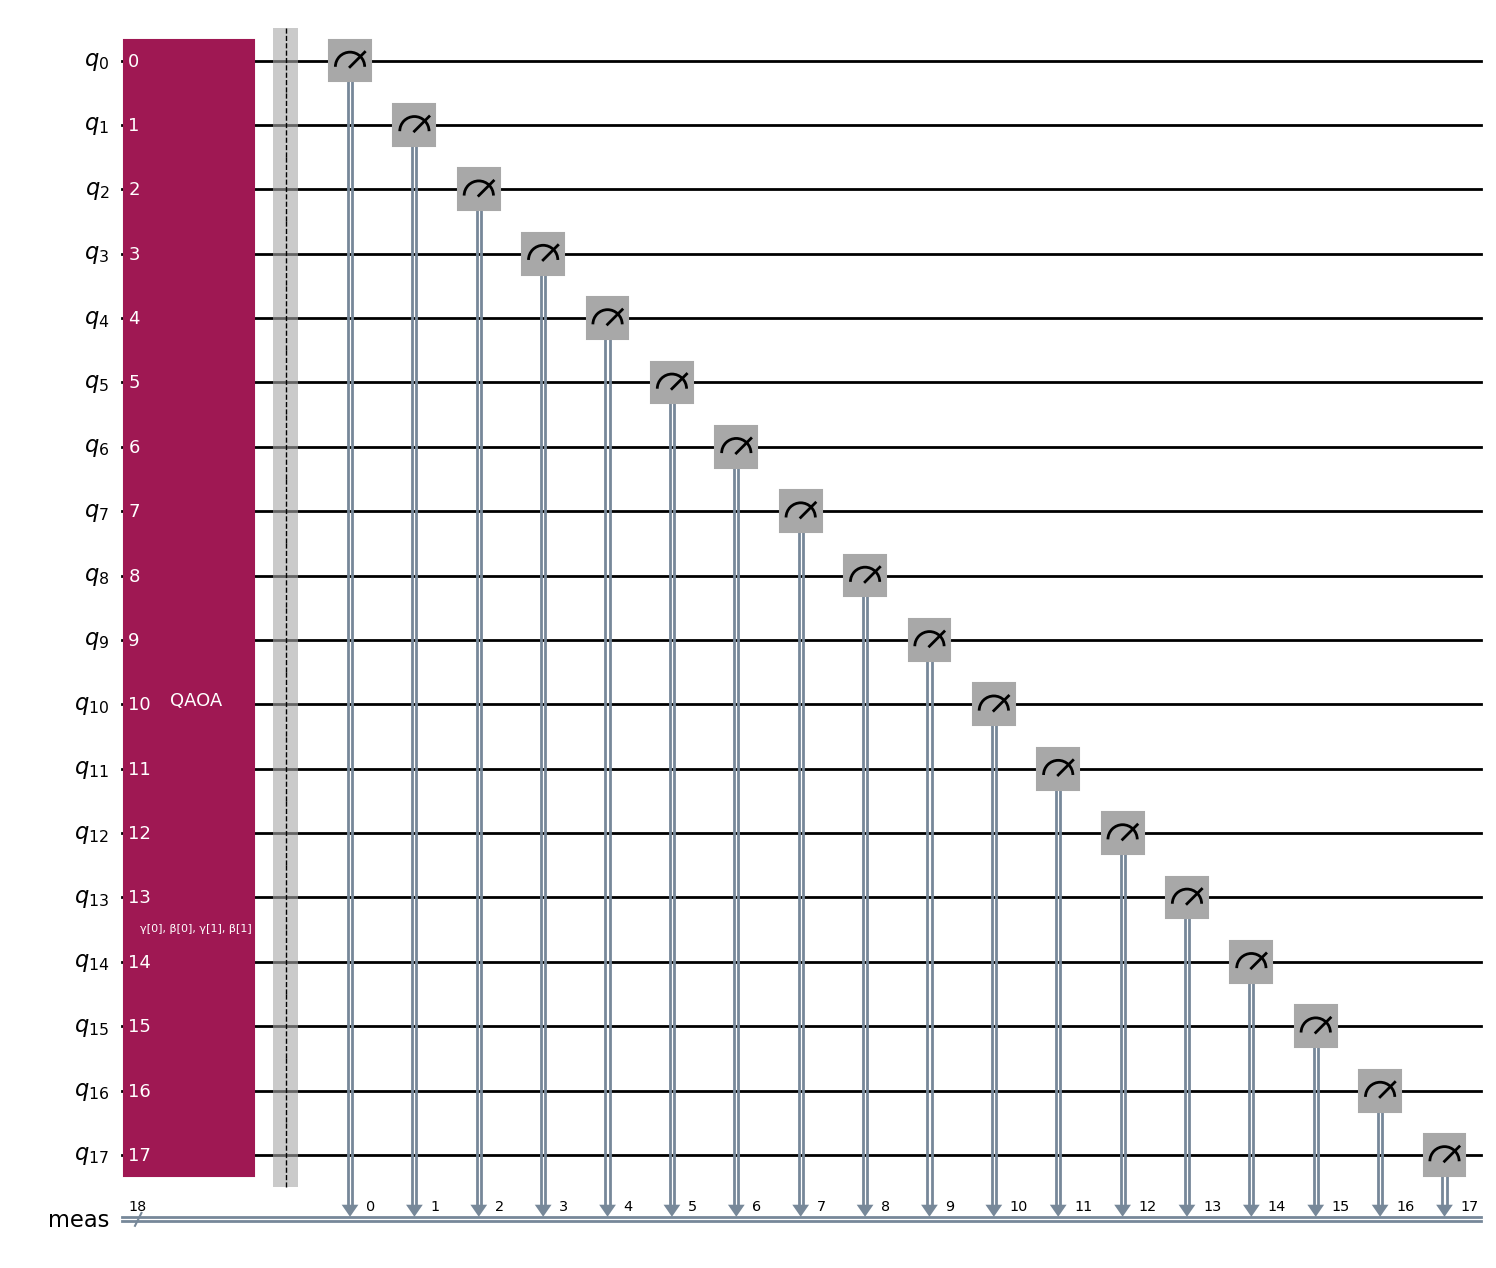

In [ ]:
from qiskit.circuit.library import QAOAAnsatz

circuit = QAOAAnsatz(cost_operator=ising_qubo, reps=2)
circuit.measure_all()
circuit.draw("mpl")

In [ ]:
api = ''
crn = ''

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel="ibm_quantum_platform",
    token=api,
    instance=crn
)

qiskit_runtime_service._discover_account:WARNING:2025-12-29 13:58:49,030: Loading account with the given token. A saved account will not be used.


In [ ]:
from qiskit_aer import AerSimulator

backend = AerSimulator()

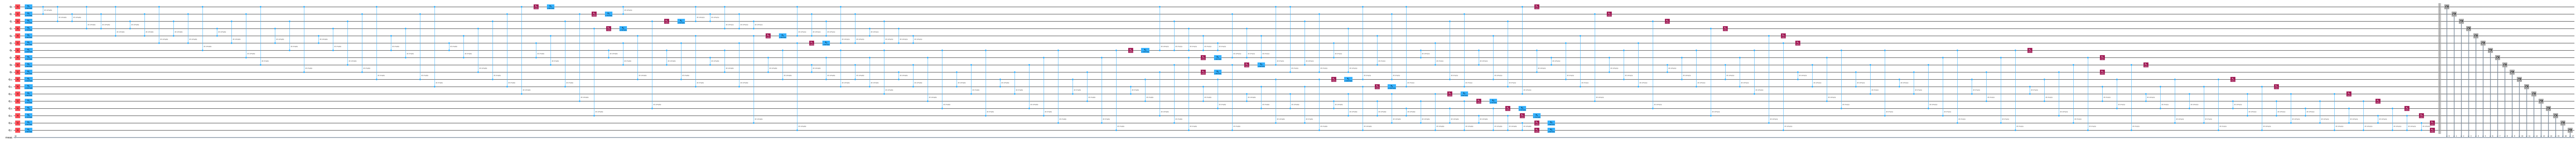

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
candidate_circuit = pm.run(circuit)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

In [ ]:
import numpy as np

initial_gamma = np.pi
initial_beta = np.pi / 2
init_params = [initial_beta, initial_beta, initial_gamma, initial_gamma]

In [ ]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)

    return cost

In [ ]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator, Session
from scipy.optimize import minimize

objective_func_vals = []
with Session(backend=backend) as session:
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 1000

    # Set simple error suppression/mitigation options
    estimator.options.dynamical_decoupling.enable = True
    estimator.options.dynamical_decoupling.sequence_type = "XY4"
    estimator.options.twirling.enable_gates = True
    estimator.options.twirling.num_randomizations = "auto"

    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, ising_qubo, estimator),
        method="COBYLA",
        tol=1e-2,
    )
    print(result)

/usr/local/lib/python3.12/dist-packages/qiskit_ibm_runtime/fake_provider/local_service.py:274: UserWarning: Options {'dynamical_decoupling': {'enable': True, 'sequence_type': 'XY4'}, 'twirling': {'enable_gates': True, 'num_randomizations': 'auto'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: -152.0829170829171
       x: [ 3.306e+00  1.315e+00  2.532e+00  3.011e+00]
    nfev: 24
   maxcv: 0.0


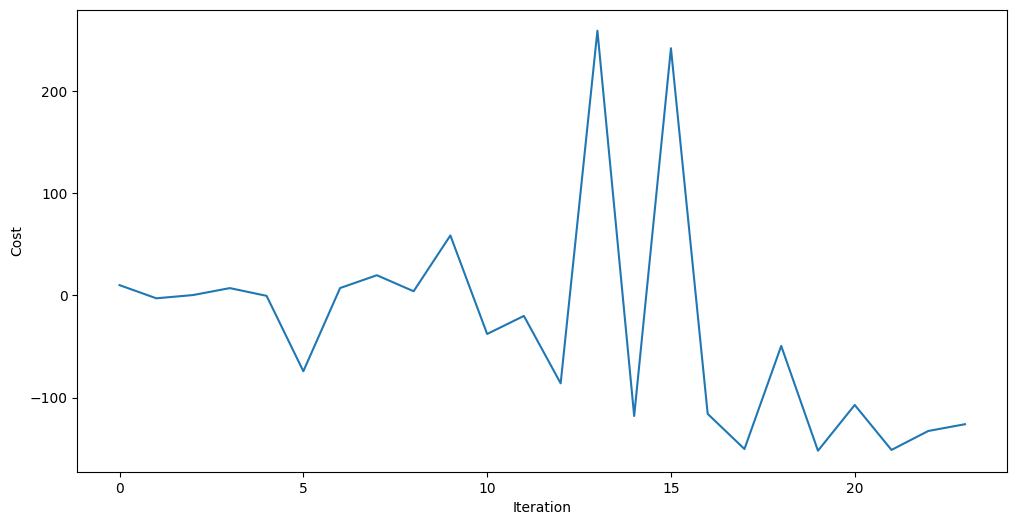

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

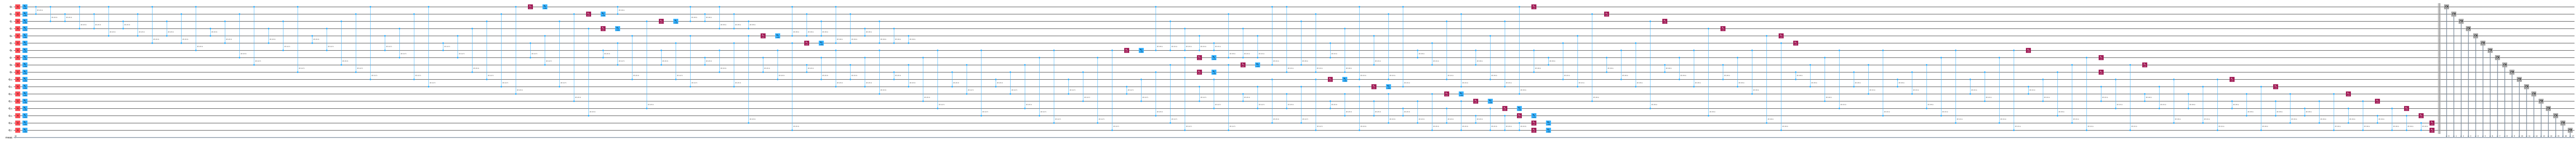

In [ ]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
optimized_circuit.draw("mpl", fold=False, idle_wires=False)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)
sampler.options.default_shots = 10000

# Set simple error suppression/mitigation options
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"
sampler.options.twirling.enable_gates = True
sampler.options.twirling.num_randomizations = "auto"

pub = (optimized_circuit,)
job = sampler.run([pub], shots=int(1e4))
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val / shots for key, val in counts_int.items()}
final_distribution_bin = {key: val / shots for key, val in counts_bin.items()}
print(final_distribution_int)

{181136: 0.0001, 3371: 0.0001, 165444: 0.0001, 185418: 0.0001, 66772: 0.0001, 85078: 0.0001, 2352: 0.0001, 5530: 0.0001, 18474: 0.0002, 159850: 0.0001, 214499: 0.0001, 41351: 0.0001, 9490: 0.0001, 19942: 0.0001, 170033: 0.0001, 79446: 0.0001, 50188: 0.0001, 17601: 0.0002, 204353: 0.0001, 211208: 0.0002, 20528: 0.0001, 18731: 0.0001, 250816: 0.0001, 118540: 0.0001, 223318: 0.0001, 180548: 0.0001, 213776: 0.0001, 134798: 0.0001, 240456: 0.0001, 105409: 0.0001, 169174: 0.0001, 145040: 0.0001, 68115: 0.0001, 46024: 0.0001, 259851: 0.0001, 51857: 0.0001, 98173: 0.0001, 234628: 0.0003, 124948: 0.0001, 171682: 0.0001, 98753: 0.0001, 139275: 0.0001, 35138: 0.0001, 25243: 0.0001, 43650: 0.0001, 164388: 0.0001, 52097: 0.0001, 5292: 0.0001, 131650: 0.0001, 146579: 0.0001, 16776: 0.0003, 10354: 0.0001, 35141: 0.0002, 86213: 0.0001, 12290: 0.0001, 2882: 0.0001, 16528: 0.0001, 182316: 0.0001, 49345: 0.0001, 1460: 0.0001, 1575: 0.0001, 77228: 0.0001, 28734: 0.0001, 69699: 0.0001, 180716: 0.0002, 1587

In [ ]:
# auxiliary functions to sample most likely bitstring
def to_bitstring2(integer, num_bits):
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely_bitstring = to_bitstring2(most_likely, optimized_circuit.num_qubits)
most_likely_bitstring.reverse()

print("Result bitstring:", most_likely_bitstring)

Result bitstring: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
